[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/work/blob/master/Portfolio%20Optimization_FANG_COV%20Annotated_Complete.ipynb)

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#pyplot had to be imported

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly

In [0]:
symbols = ['FB', 'AAPL', 'NFLX', 'GOOG']
noa = len(symbols)
# this is a list that will then be looped for a dataframe

In [5]:
type(noa)

int

In [0]:
start = datetime.datetime(2018, 4, 28)
#datetime for pulling quotes

In [0]:
end = datetime.datetime(2018, 10, 3)

In [88]:
f = web.DataReader('GOOG', 'iex', start, end)
f.head(1)
#check if the Datareader is working

,open,high,low,close,volume
date,,,,,
2018-04-30,1030.01,1037.0,1016.85,1017.33,1671254


In [89]:
data = pd.DataFrame()
for sym in symbols:
 data[sym] = web.DataReader(sym, data_source='iex', start=start, end=end)['close']
data.columns = symbols
#loop that creates a dataframe
data.head(1)

,FB,AAPL,NFLX,GOOG
date,,,,
2018-04-30,172.0,164.0499,312.46,1017.33


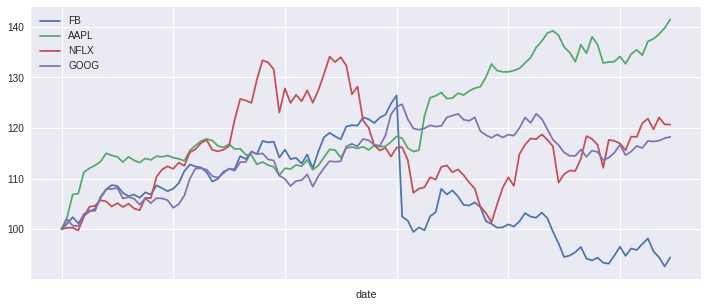

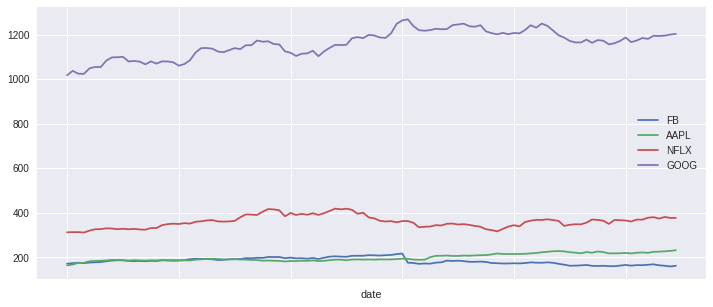

In [90]:
(data / data.iloc[0] * 100).plot(figsize=(12, 5))
(data).plot(figsize=(12, 5))
#ix is depreciated, replaced by iloc
#this normals the data to a zero base


In [92]:
rets = np.log(data / data.shift(1))
#new column for returns based on position above
#this uses log returns
rets.info()
#info show that the dataframe is empty for the first column, there's no shift down
rets.head(1)


<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 2018-04-30 to 2018-10-03
Data columns (total 4 columns):
FB      109 non-null float64
AAPL    109 non-null float64
NFLX    109 non-null float64
GOOG    109 non-null float64
dtypes: float64(4)
memory usage: 4.3+ KB


,FB,AAPL,NFLX,GOOG
date,,,,
2018-04-30,NaN,NaN,NaN,NaN


In [93]:
rets.head(2)
#check for log returns 
#for NFLX the simple return 0.012165
#log returns are lower when positive and higher when negative (until infinite)
#they're also symmetrical

,FB,AAPL,NFLX,GOOG
date,,,,
2018-04-30,NaN,NaN,NaN,NaN
2018-05-01,0.010756,0.02297,0.002685,0.019449


In [94]:
data.head(2)

,FB,AAPL,NFLX,GOOG
date,,,,
2018-04-30,172.00,164.0499,312.46,1017.33
2018-05-01,173.86,167.8618,313.30,1037.31


In [95]:
rets['NFLX']

date
2018-04-30         NaN
2018-05-01    0.002685
2018-05-02    0.000191
2018-05-03   -0.005344
2018-05-04    0.026593
2018-05-07    0.019092
2018-05-08    0.001929
2018-05-09    0.010378
2018-05-10   -0.002122
2018-05-11   -0.009572
2018-05-14    0.006321
2018-05-15   -0.007332
2018-05-16    0.006297
2018-05-17   -0.009091
2018-05-18   -0.003203
2018-05-21    0.023294
2018-05-22   -0.000603
2018-05-23    0.038743
2018-05-24    0.013170
2018-05-25    0.005710
2018-05-29   -0.004451
2018-05-30    0.010835
2018-05-31   -0.005502
2018-06-01    0.023415
2018-06-04    0.005210
2018-06-05    0.010968
2018-06-06    0.004501
2018-06-07   -0.016602
2018-06-08   -0.002299
2018-06-11    0.002438
                ...   
2018-08-22    0.018815
2018-08-23   -0.015418
2018-08-24    0.056319
2018-08-27    0.015925
2018-08-28    0.010668
2018-08-29   -0.001222
2018-08-30    0.007957
2018-08-31   -0.008935
2018-09-04   -0.011159
2018-09-05   -0.063644
2018-09-06    0.015357
2018-09-07    0.006387
2018-0

In [97]:
rets.mean() * 252
#simple arithmetic mean 

FB     -0.132352
AAPL    0.801934
NFLX    0.434414
GOOG    0.387468
dtype: float64

In [98]:
rets.cov()*252
#covariance happens on the daily
#there are copies of figures AAPL & NFLX = NFLX & AAPL

,FB,AAPL,NFLX,GOOG
FB,0.152227,0.018621,0.032380,0.025445
AAPL,0.018621,0.038554,0.013857,0.016067
NFLX,0.032380,0.013857,0.120590,0.024048
GOOG,0.025445,0.016067,0.024048,0.035761


In [99]:
weights = np.random.random(noa)
weights /= np.sum(weights)
#new numpy array of 4 random number that add up to 1
#second line assures weight are equal to 1
weights

array([0.24144498, 0.32784422, 0.03479209, 0.39591872])

In [100]:
np.sum(rets.mean() * weights) * 252
#using FANG Sept 2018 returns if FB is a high weighting, low returns, NFLX high weighting, higher returns

0.39947392285507394

In [116]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
#rets is a pandas dataframe, weights is a numpy array 
#in order to work the size of the two arrays need to be equal 
#this only works with a dot in a dot which is a numpy array

0.032275605534023345

In [117]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.1796541275173586

In [0]:
prets = []
pvols = []
#prets and vols are np.arrays
for p in range (500):
 #loop underlines number of iterations
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 #this makes it equal to 1
 prets.append(np.sum(rets.mean() * weights) * 252)
 #i get a value for each loop
 pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
  #covariance value for each loop

prets = np.array(prets)
pvols = np.array(pvols)
#turns prets and pvols from lists into numpy arrays

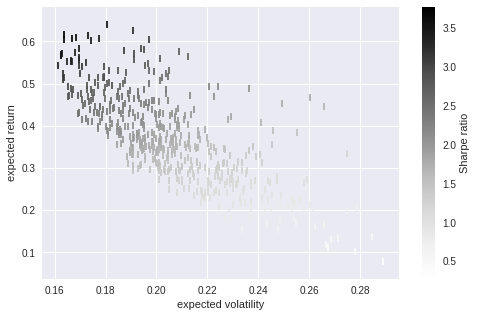

In [169]:
plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets, c = prets / pvols, marker='|')
# c is a calculated column of a sharpe ratio minus a risk free rate
# x-axis, y-axis, marker allows me to change the point style
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [0]:
palt?

In [0]:
x = np.array([[-1,-1], [1,1],]).T

In [0]:
np.cov(x)
#think about deviations from the mean, eg 2 data with identical values will have covariance of 0
#the size of matrix will lead to the number of covariances, eg. 2 will be 4, 4 will be 16
#correlation is scaled covariance

array([[2., 2.],
       [2., 2.]])

In [0]:
rets.shape()

TypeError: ignored

In [0]:
x/